In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings

In [13]:
warnings.filterwarnings("ignore")
register_matplotlib_converters()

In [14]:
file_path = "NYC-Airbnb-2023.csv"
df = pd.read_csv('/content/NYC-Airbnb-2023.csv')

In [16]:
# Baisc Inspection
print("Initial shape:", df.shape)
print(df.columns)
print(df[['last_review', 'reviews_per_month']].head())

Initial shape: (42931, 18)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
  last_review  reviews_per_month
0  2022-06-21               0.30
1  2019-12-02               0.30
2  2017-07-21               0.72
3  2023-02-19               3.41
4  2022-08-10               0.03


In [17]:
# Data cleaning
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df = df.dropna(subset=['reviews_per_month', 'last_review'])

In [18]:
# Feature engineering
df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month
df['year_month'] = df['last_review'].dt.to_period('M')

In [19]:
monthly_reviews = df.groupby('year_month')['reviews_per_month'].sum().to_timestamp()

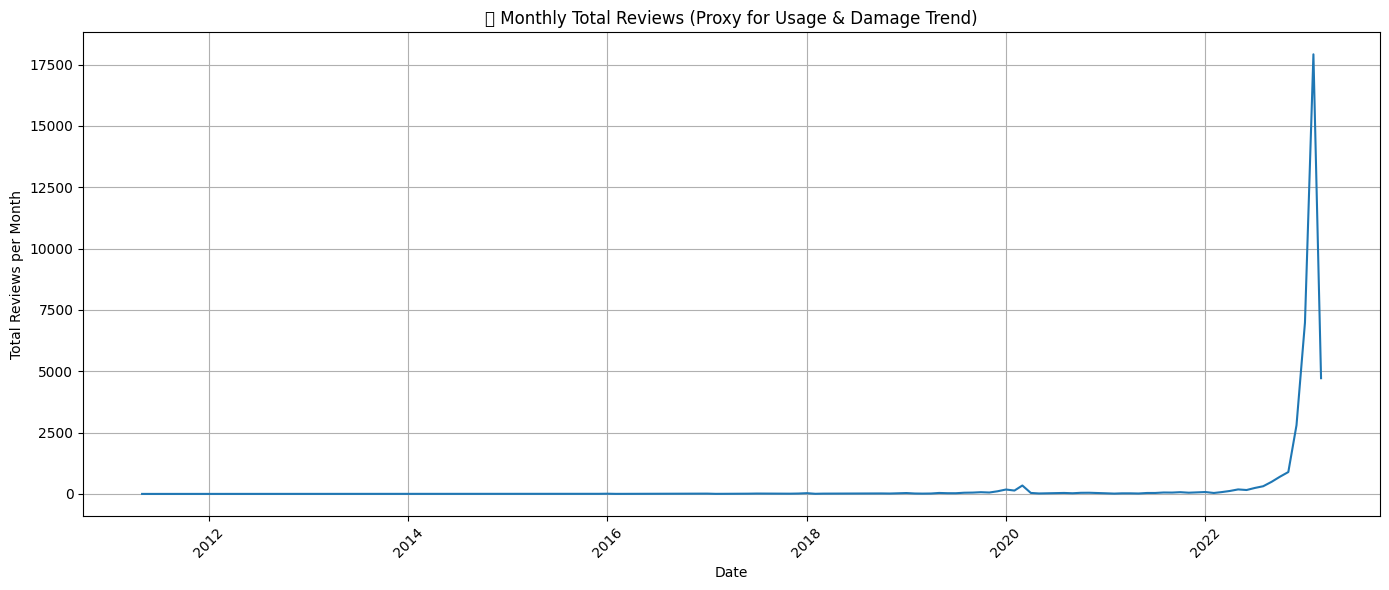

In [20]:
# Plot review trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_reviews)
plt.title("📊 Monthly Total Reviews (Proxy for Usage & Damage Trend)")
plt.xlabel("Date")
plt.ylabel("Total Reviews per Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Forecasting with ARIMA
model = ARIMA(monthly_reviews, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_reviews.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')


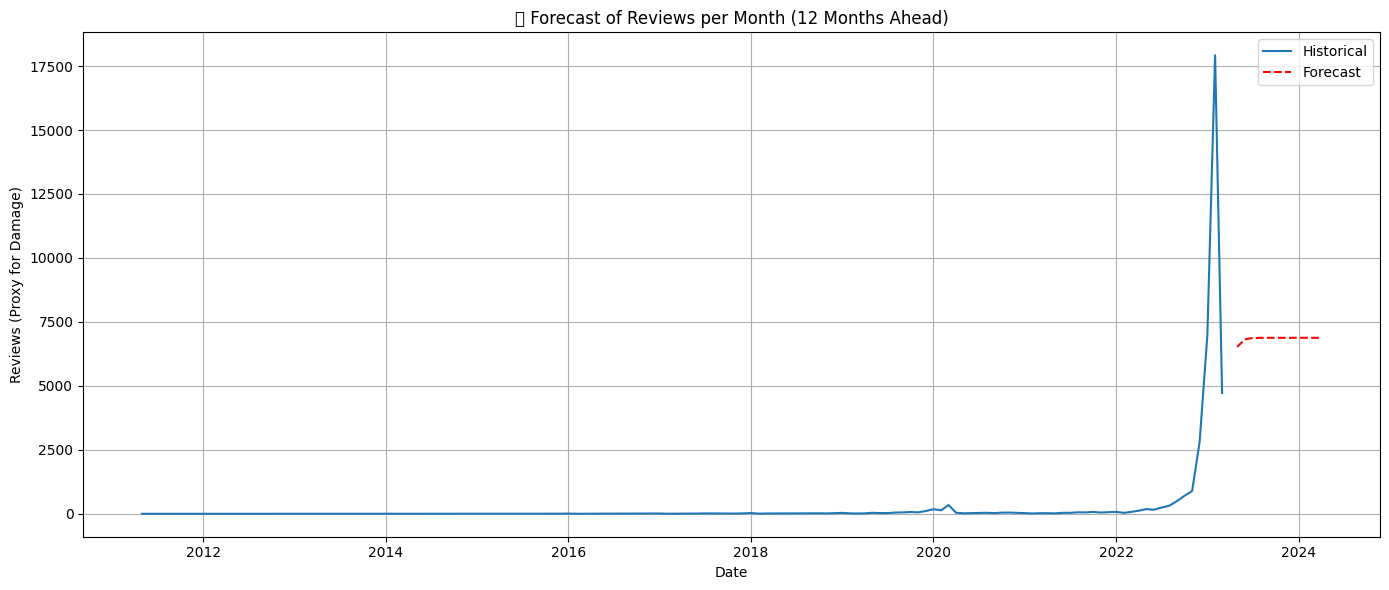

In [22]:
# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(monthly_reviews.index, monthly_reviews, label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')
plt.title("🔮 Forecast of Reviews per Month (12 Months Ahead)")
plt.xlabel("Date")
plt.ylabel("Reviews (Proxy for Damage)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

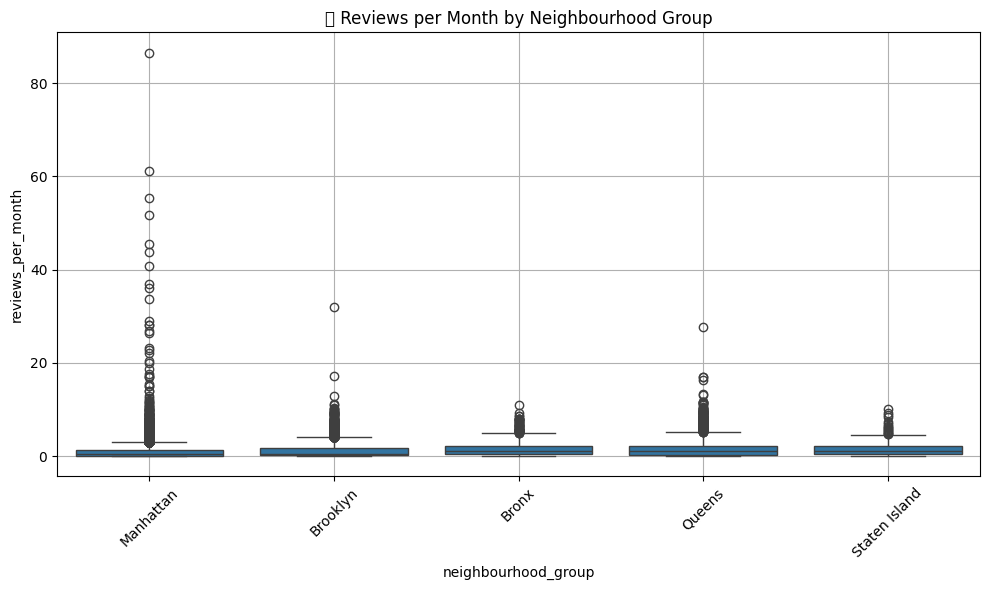

In [23]:
# Insights by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='reviews_per_month')
plt.title("📍 Reviews per Month by Neighbourhood Group")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

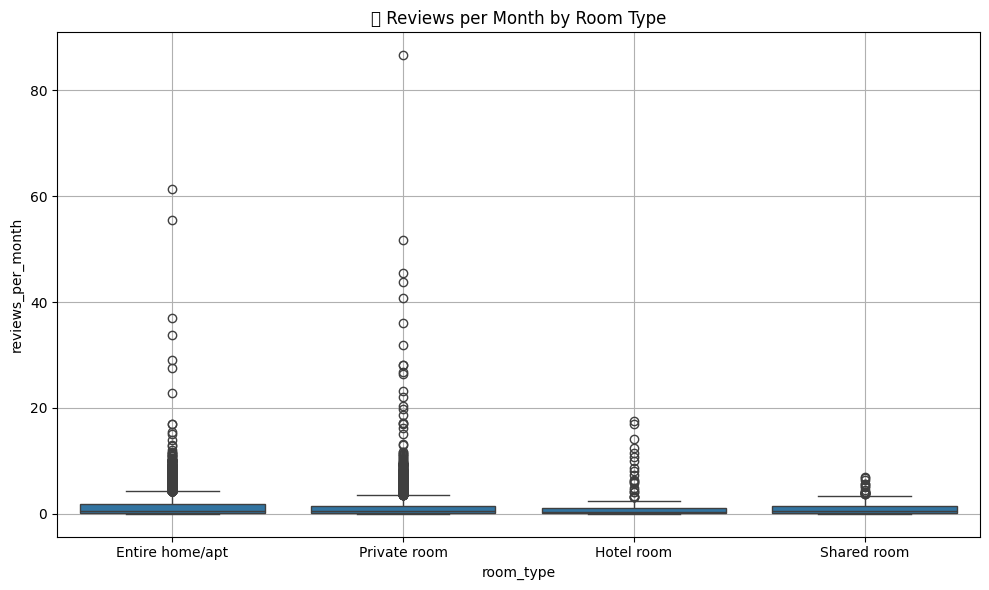

In [24]:
# Room type analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='reviews_per_month')
plt.title("🏠 Reviews per Month by Room Type")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
forecast_df = pd.DataFrame({
    'date': forecast_index,
    'forecast_reviews': forecast
})

In [26]:
forecast_df.to_csv("forecast_reviews.csv", index=False)
print("✅ Forecast saved to forecast_reviews.csv")

✅ Forecast saved to forecast_reviews.csv


In [28]:
print(" Analysis Complete. Visualized trends, predicted future reviews (damage proxy), and saved results.")

 Analysis Complete. Visualized trends, predicted future reviews (damage proxy), and saved results.


In [29]:
df = df.dropna(subset=['neighbourhood_group', 'room_type', 'price'])
df = df[df['price'] < 1000]

In [30]:
pivot_table = df.pivot_table(
    values='price',
    index='neighbourhood_group',
    columns='room_type',
    aggfunc='mean'
)

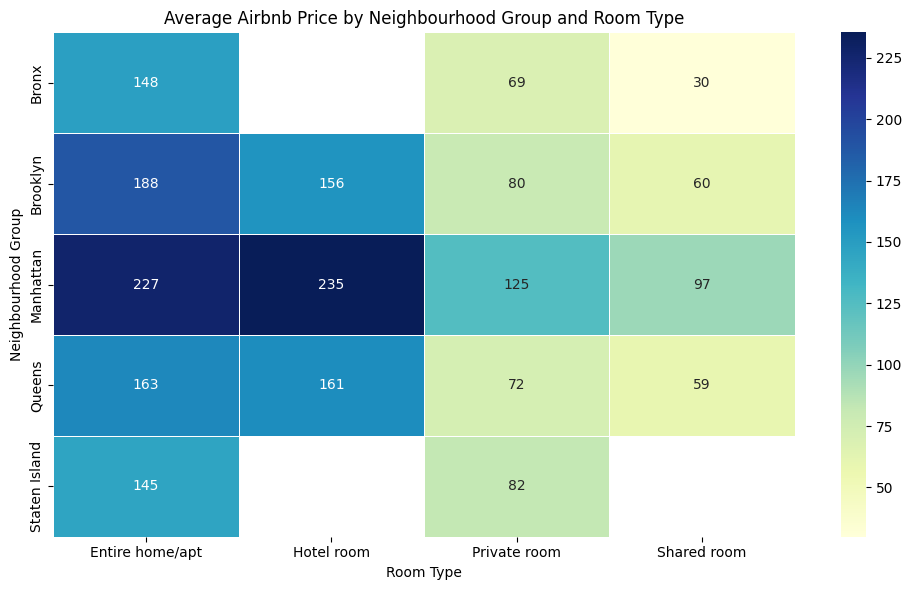

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Airbnb Price by Neighbourhood Group and Room Type")
plt.ylabel("Neighbourhood Group")
plt.xlabel("Room Type")
plt.tight_layout()
plt.show()